## 📦 Importing Libraries

In this section, we import all the necessary libraries for data analysis, preprocessing, visualization, and model building:

- **pandas, numpy**: For data manipulation and numerical operations.
- **matplotlib.pyplot, seaborn**: For data visualization and exploratory analysis.
- **os, kagglehub**: For environment interaction and dataset access via Kaggle.
- **datetime**: To handle any date/time operations if needed.
- **sklearn.model_selection.train_test_split**: To split the dataset into training and testing sets.
- **sklearn.preprocessing**:
  - `StandardScaler`: For feature scaling.
  - `LabelEncoder`: For encoding categorical variables.
- **sklearn.linear_model.LinearRegression**: For building a linear regression model.
- **sklearn.metrics**:
  - `mean_squared_error`, `r2_score`: For evaluating regression model performance.
- **sklearn.ensemble**:
  - `GradientBoostingRegressor`, `RandomForestRegressor`: For ensemble-based regression modeling.
- **sklearn.tree.DecisionTreeRegressor**: For decision tree regression modeling.

These libraries will support us through data exploration, feature engineering, and building and evaluating multiple regression models.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import kagglehub
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

## 📥 Loading the Dataset

We use `kagglehub` to download the dataset titled **"The Global AI/ML/Data Science Salary for 2025"** directly from Kaggle. After downloading:

- The path to the dataset is printed to confirm successful download.
- A list of the dataset files is displayed using `os.listdir()`.
- The main CSV file (`salaries.csv`) is read into a DataFrame named `df`.
- The first few rows of the dataset are displayed using `df.head()` to get an initial look at the data structure and content.


In [ ]:
path = kagglehub.dataset_download("samithsachidanandan/the-global-ai-ml-data-science-salary-for-2025")
print("Path to dataset files:", path)

100%|██████████| 581k/581k [00:00<00:00, 1.32MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/samithsachidanandan/the-global-ai-ml-data-science-salary-for-2025/versions/1


In [ ]:
print(os.listdir(path))

['salaries.csv']


In [ ]:
df = pd.read_csv(f"{path}/salaries.csv")
df.head()


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,MI,FT,Customer Success Manager,57000,EUR,60000,NL,50,NL,L
1,2025,SE,FT,Engineer,165000,USD,165000,US,0,US,M
2,2025,SE,FT,Engineer,109000,USD,109000,US,0,US,M
3,2025,SE,FT,Applied Scientist,294000,USD,294000,US,0,US,M
4,2025,SE,FT,Applied Scientist,137600,USD,137600,US,0,US,M


## 🔍 Exploring the Dataset

In this step, we perform an initial exploration of the dataset to understand its structure and identify potential data quality issues:

- **Shape**: Displays the number of rows and columns.
- **Columns**: Lists all the column names present in the dataset.
- **Info**: Shows data types, non-null counts, and memory usage.
- **Summary Statistics**: Uses `describe()` to provide statistical insights (e.g., mean, std, min, max) for both numeric and categorical features.
- **Missing Values**: Identifies columns with missing data.
- **Duplicate Rows**: Counts how many rows are exact duplicates, which might need to be dropped.

This foundational overview helps guide the preprocessing and cleaning steps that follow.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88584 entries, 0 to 88583
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           88584 non-null  int64 
 1   experience_level    88584 non-null  object
 2   employment_type     88584 non-null  object
 3   job_title           88584 non-null  object
 4   salary              88584 non-null  int64 
 5   salary_currency     88584 non-null  object
 6   salary_in_usd       88584 non-null  int64 
 7   employee_residence  88584 non-null  object
 8   remote_ratio        88584 non-null  int64 
 9   company_location    88584 non-null  object
 10  company_size        88584 non-null  object
dtypes: int64(4), object(7)
memory usage: 7.4+ MB


In [ ]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,88584.000000,8.858400e+04,88584.000000,88584.000000
mean,2024.034758,1.619323e+05,157567.798417,21.286011
std,0.620370,1.965317e+05,73531.373158,40.831018
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060000e+05,106097.250000,0.000000
50%,2024.000000,1.470000e+05,146307.000000,0.000000
75%,2024.000000,1.995000e+05,198600.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [ ]:
df.isna().sum()

,0
work_year,0
experience_level,0
employment_type,0
job_title,0
salary,0
salary_currency,0
salary_in_usd,0
employee_residence,0
remote_ratio,0
company_location,0


In [ ]:
df.duplicated().sum()

np.int64(44340)

In [ ]:
df.drop_duplicates(inplace = True)
df.duplicated().sum()

np.int64(0)

## 🧹 Data Cleaning & Summary

Based on the initial exploration:

- ✅ **No missing values** were found in the dataset.
- ⚠️ Over **50% of the rows were duplicates**, which could skew the analysis.

### ✔️ Actions Taken:
- **Dropped duplicate rows** to ensure data quality and avoid bias in our modeling.
- Rechecked the shape and ran summary statistics on the cleaned dataset.


In [ ]:
df["job_title"].value_counts().head(20)


,count
job_title,
Data Scientist,5207
Data Engineer,4916
Data Analyst,4355
Software Engineer,3009
Machine Learning Engineer,2583
Engineer,2515
Manager,2010
Analyst,1303
Research Scientist,1027


## 📈 Deeper Exploratory Data Analysis

### 1. Mean & Median Salary Over Years
- Displays overall salary trends year by year.
- Compares **mean** vs. **median** to detect skewness or salary inflation.

### 2. Top 10 Median Salaries by Job Title
- Highlights the most lucrative job titles based on **median** salary, avoiding the effect of outliers.

### 3. Salary Trends by Remote Work Level
- Shows how **remote work levels (0%, 50%, 100%)** impact average salaries over the years.

### 4. Salary Distribution by Company Size
- Compares salary ranges across **small (S), medium (M), and large (L)** companies using boxplots.

### 5. Salary Distribution by Company Location
- Focuses on the top 10 company locations to show regional variations in pay.

These visual insights are essential for understanding how salaries vary based on job, time, and organizational context.


<Axes: xlabel='salary_in_usd'>

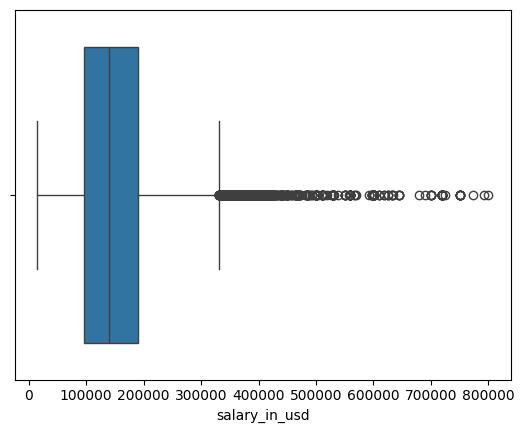

In [ ]:
sns.boxplot(x=df["salary_in_usd"])

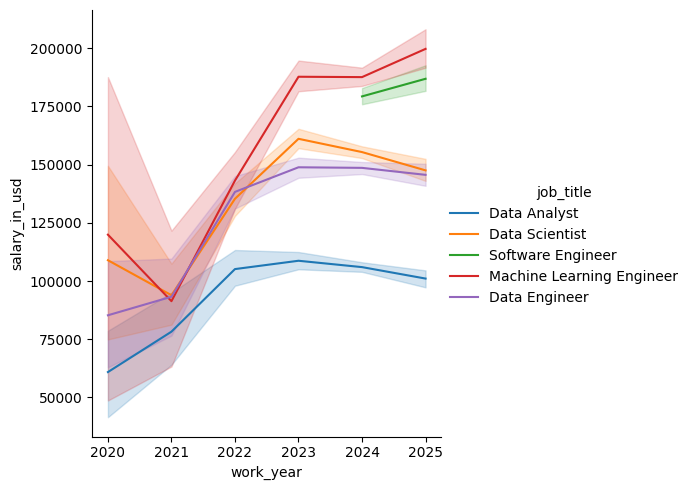

In [ ]:
x=df[df["job_title"].isin(["Data Scientist","Data Engineer","Data Analyst","Software Engineer","Machine Learning Engineer"])][["job_title","work_year","salary_in_usd"]]
sns.relplot(x="work_year",y="salary_in_usd",data=x,kind="line",hue="job_title")

In [ ]:
top_titles = df['job_title'].value_counts().sort_values(ascending=False).head(10)
df = df[df['job_title'].isin(top_titles.index)]
df['job_title'].nunique()

10

In [ ]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
1,2025,SE,FT,Engineer,165000,USD,165000,US,0,US,M
2,2025,SE,FT,Engineer,109000,USD,109000,US,0,US,M
5,2025,EN,FT,Data Analyst,82000,USD,82000,US,0,US,M
6,2025,EN,FT,Data Analyst,44000,USD,44000,US,0,US,M
9,2025,SE,FT,Research Scientist,200000,USD,200000,US,0,US,M


In [ ]:
non_numeric = df.select_dtypes("object")

for column in non_numeric.columns:

  print(f"Number of unique values in {column} column: ", non_numeric[column].nunique())

Number of unique values in experience_level column:  4
Number of unique values in employment_type column:  4
Number of unique values in job_title column:  10
Number of unique values in salary_currency column:  21
Number of unique values in employee_residence column:  78
Number of unique values in company_location column:  73
Number of unique values in company_size column:  3


<ipython-input-16-e8ccd61cc874>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df,x='work_year',y='salary_in_usd',ci=None,marker='o',estimator=np.mean,label='Mean Salary')
<ipython-input-16-e8ccd61cc874>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df,x='work_year',y='salary_in_usd',ci=None,marker='o',estimator=np.median,label='Median Salary')


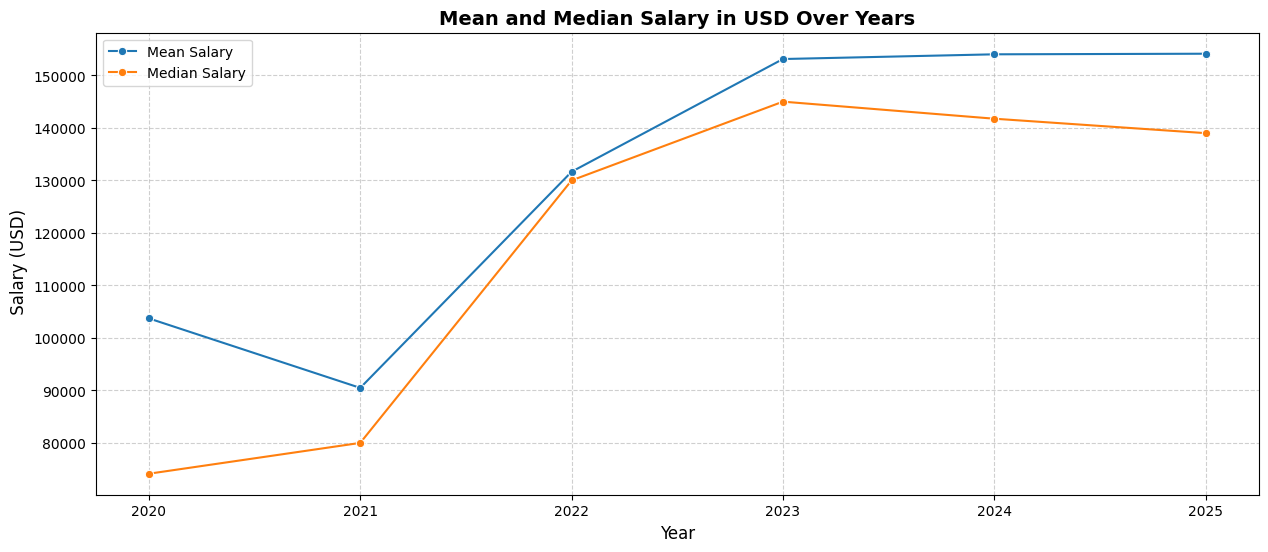

In [ ]:
plt.figure(figsize=(15, 6))
sns.lineplot(data=df,x='work_year',y='salary_in_usd',ci=None,marker='o',estimator=np.mean,label='Mean Salary')
sns.lineplot(data=df,x='work_year',y='salary_in_usd',ci=None,marker='o',estimator=np.median,label='Median Salary')
plt.title('Mean and Median Salary in USD Over Years', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel(' Salary (USD)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

<ipython-input-17-4e2ed7ffb39d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


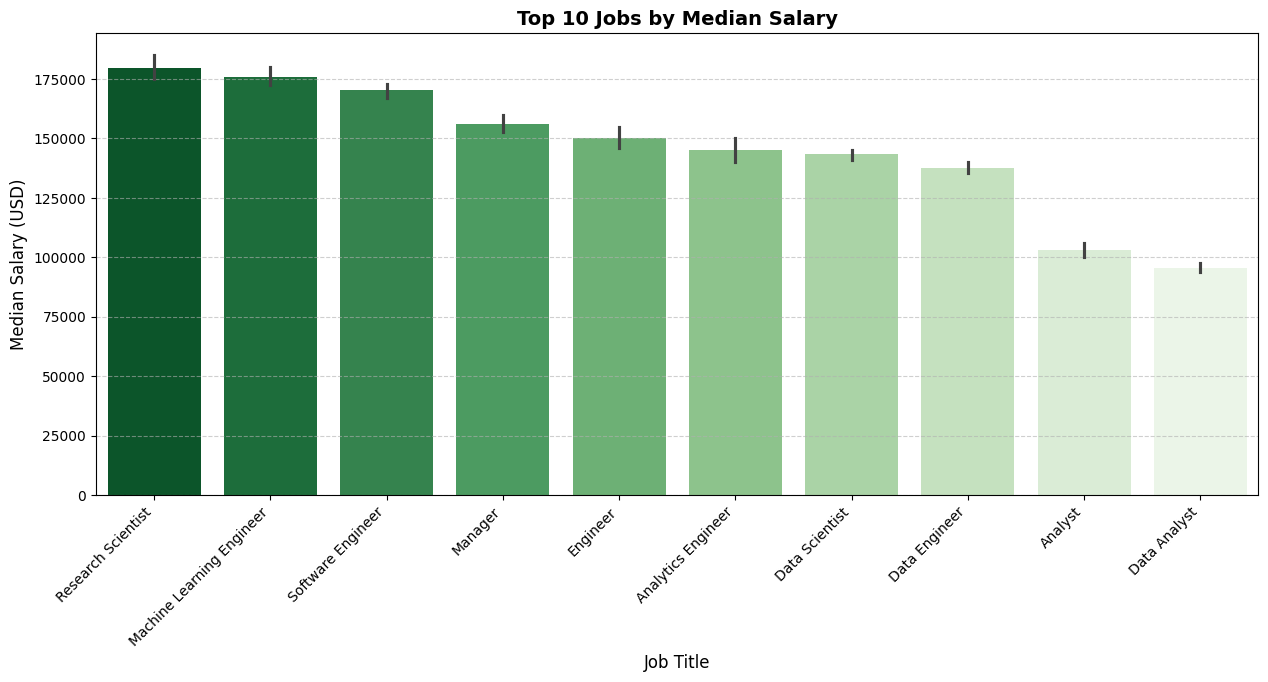

In [ ]:
job_salary = df.groupby("job_title")["salary_in_usd"].median().nlargest(10)

plt.figure(figsize=(15, 6))
sns.barplot(
    data=df[df["job_title"].isin(job_salary.index)],
    x="job_title",
    y="salary_in_usd",
    estimator=np.median,
    order=job_salary.index,
    palette="Greens_r" )
plt.title("Top 10 Jobs by Median Salary", fontsize=14, fontweight="bold")
plt.xlabel("Job Title", fontsize=12)
plt.ylabel("Median Salary (USD)", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

<ipython-input-18-258ca4869f6d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='remote_ratio', y='salary_in_usd',estimator=np.mean,palette='muted')


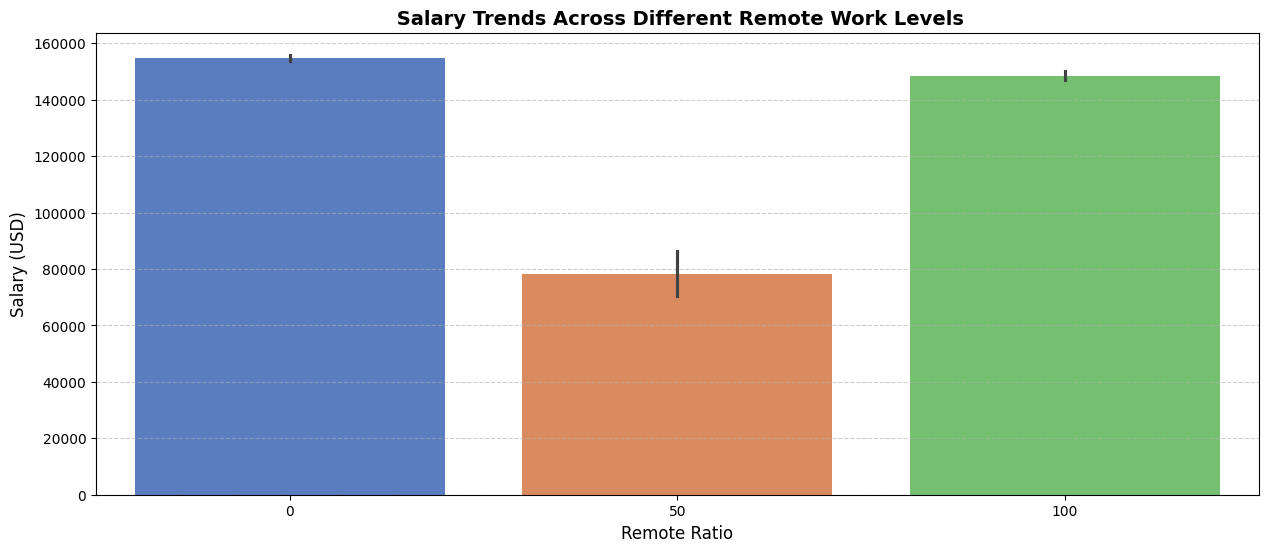

In [ ]:
plt.figure(figsize=(15, 6))
sns.barplot(data=df, x='remote_ratio', y='salary_in_usd',estimator=np.mean,palette='muted')
plt.title(" Salary Trends Across Different Remote Work Levels", fontsize=14, fontweight="bold")
plt.xlabel("Remote Ratio", fontsize=12)
plt.ylabel("Salary (USD)", fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

<ipython-input-19-35a05e0bfce2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='company_size', y='salary_in_usd',estimator=np.median,palette='muted')


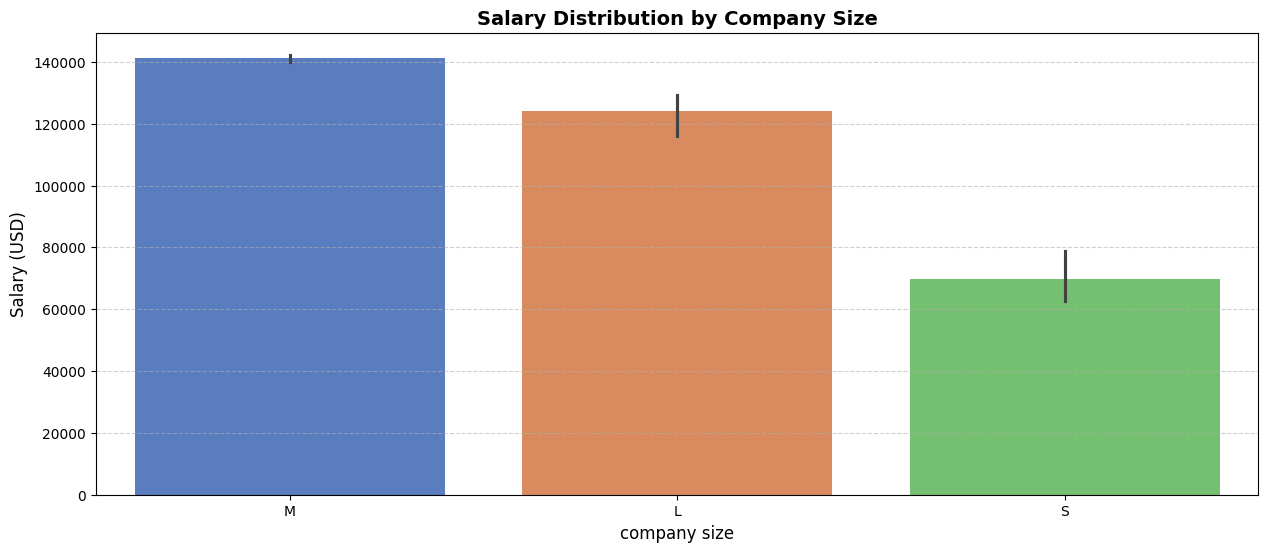

In [ ]:
plt.figure(figsize=(15, 6))
sns.barplot(data=df, x='company_size', y='salary_in_usd',estimator=np.median,palette='muted')
plt.title("Salary Distribution by Company Size" ,fontsize=14, fontweight="bold")
plt.xlabel("company size",fontsize=12)
plt.ylabel("Salary (USD)",fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

<ipython-input-20-732055e19e7e>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


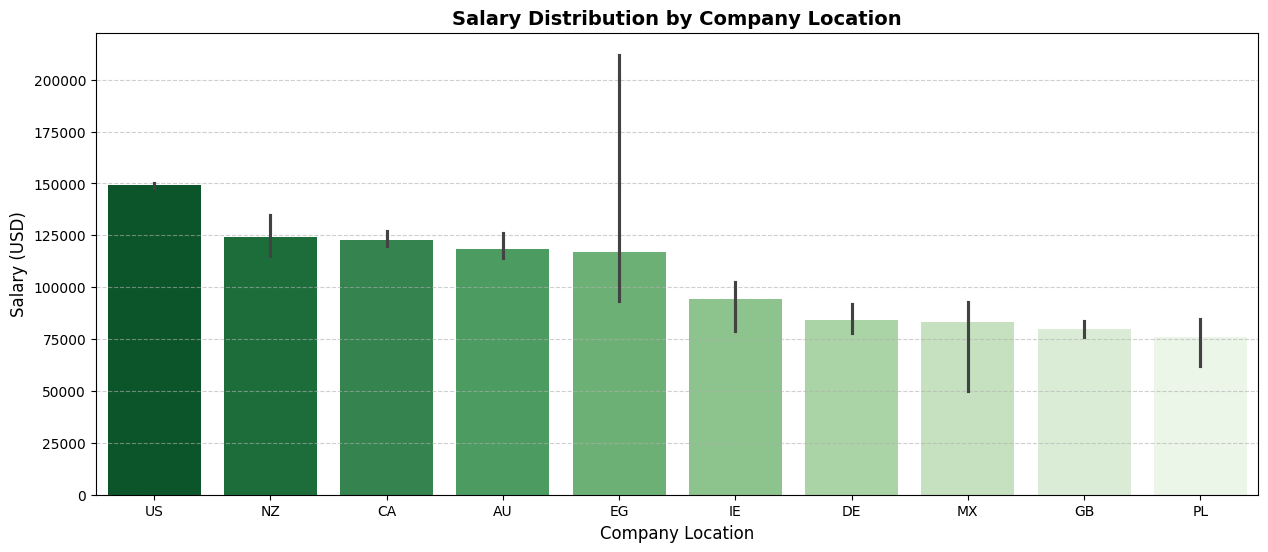

In [ ]:
# Count the number of records for each company location
company_location_counts = df['company_location'].value_counts()

# Filter company locations with at least 20 records
valid_locations = company_location_counts[company_location_counts >= 20].index

# Get the top 10 company locations by median salary (after filtering)
top_company = df[df['company_location'].isin(valid_locations)].groupby("company_location")["salary_in_usd"].median().nlargest(10)

# Plot
plt.figure(figsize=(15, 6))
sns.barplot(
    data=df[df["company_location"].isin(top_company.index)],
    x='company_location', y='salary_in_usd',
    estimator=np.median, palette='Greens_r',
    order=top_company.index,
)
plt.title("Salary Distribution by Company Location", fontsize=14, fontweight="bold")
plt.xlabel("Company Location", fontsize=12)
plt.ylabel("Salary (USD)", fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()


<ipython-input-21-f1412b49fe73>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='employment_type',palette='muted',)


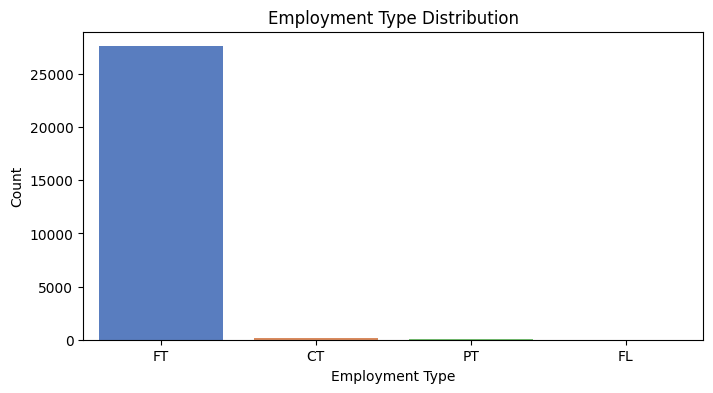

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df,x='employment_type',palette='muted',)
plt.title("Employment Type Distribution")
plt.xlabel("Employment Type")
plt.ylabel("Count")
plt.show()

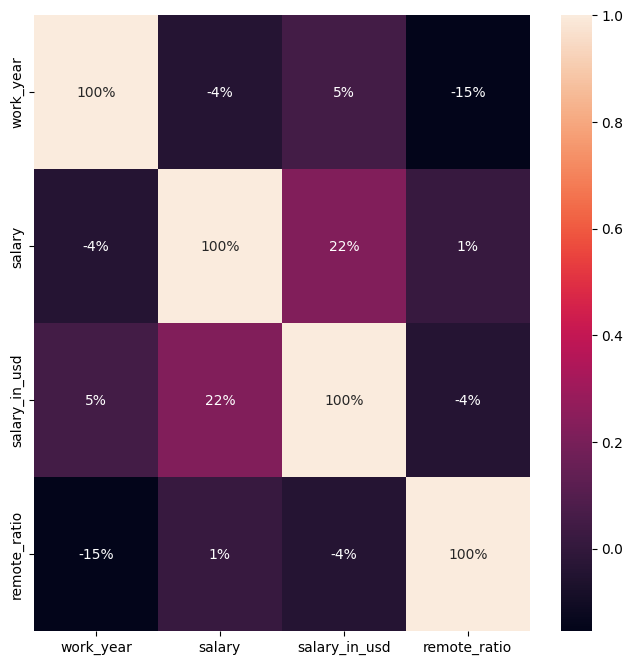

In [ ]:
empNumirec= df.select_dtypes(include=['number'])
plt.figure(figsize=(8,8))
sns.heatmap(empNumirec.corr(),annot=True, fmt='.0%')
plt.show()

## 🤖 Machine Learning & Salary Prediction

We aim to build regression models that predict `salary_in_usd` based on various employee and job-related features.

### 🔧 Preprocessing Steps
- Encoded all categorical columns using `LabelEncoder`.
- Scaled the numerical features using `StandardScaler`.
- Split the dataset into 80% training and 20% testing sets.

### 📊 Models Trained
- **Linear Regression**
- **Decision Tree Regressor**
- **Random Forest Regressor**
- **Gradient Boosting Regressor**

Each model was evaluated using:
- **RMSE (Root Mean Squared Error)**: Indicates the average prediction error.
- **R² Score**: Measures how well the model explains the variance in salary.

This approach allows us to compare baseline and advanced models and identify the most effective one for predicting salaries.


In [ ]:
le = LabelEncoder()
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [ ]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
1,2025,3,2,5,165000,20,165000,73,0,69,1
2,2025,3,2,5,109000,20,109000,73,0,69,1
5,2025,0,2,2,82000,20,82000,73,0,69,1
6,2025,0,2,2,44000,20,44000,73,0,69,1
9,2025,3,2,8,200000,20,200000,73,0,69,1
...,...,...,...,...,...,...,...,...,...,...,...
88575,2021,2,2,4,160000,16,119059,64,100,36,1
88577,2021,2,2,3,24000,6,28369,48,50,46,0
88579,2020,3,2,4,412000,20,412000,73,100,69,0
88581,2020,0,2,4,105000,20,105000,73,100,69,2


In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

# Apply scaling only to numeric columns
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[col] = sc.fit_transform(df[[col]])

df


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
1,1.297796,0.745924,0.038633,0.241415,0.010048,0.288308,0.157305,0.409982,-0.596055,0.407704,0.126522
2,1.297796,0.745924,0.038633,0.241415,-0.175778,0.288308,-0.564401,0.409982,-0.596055,0.407704,0.126522
5,1.297796,-2.262003,0.038633,-0.974480,-0.265373,0.288308,-0.912366,0.409982,-0.596055,0.407704,0.126522
6,1.297796,-2.262003,0.038633,-0.974480,-0.391469,0.288308,-1.402094,0.409982,-0.596055,0.407704,0.126522
9,1.297796,0.745924,0.038633,1.457310,0.126190,0.288308,0.608370,0.409982,-0.596055,0.407704,0.126522
...,...,...,...,...,...,...,...,...,...,...,...
88575,-4.055840,-0.256718,0.038633,-0.163883,-0.006543,-0.799676,-0.434764,-0.050685,1.690375,-1.408443,0.126522
88577,-4.055840,-0.256718,0.038633,-0.569182,-0.457835,-3.519634,-1.603540,-0.869649,0.547160,-0.858095,-5.726063
88579,-5.394249,0.745924,0.038633,-0.163883,0.829674,0.288308,3.340540,0.409982,1.690375,0.407704,-5.726063
88581,-5.394249,-2.262003,0.038633,-0.163883,-0.189051,0.288308,-0.615951,0.409982,1.690375,0.407704,5.979107


In [ ]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
X = df[numeric_cols].drop(columns=['salary_in_usd'])
y = df['salary_in_usd']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [ ]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(X_test)
print(f'Mean Squared Error {mean_squared_error(y_test,y_pred)}')
print(f'R Squared {r2_score(y_test,y_pred)}')

Mean Squared Error 0.770655040367217
R Squared 0.2589485494744821


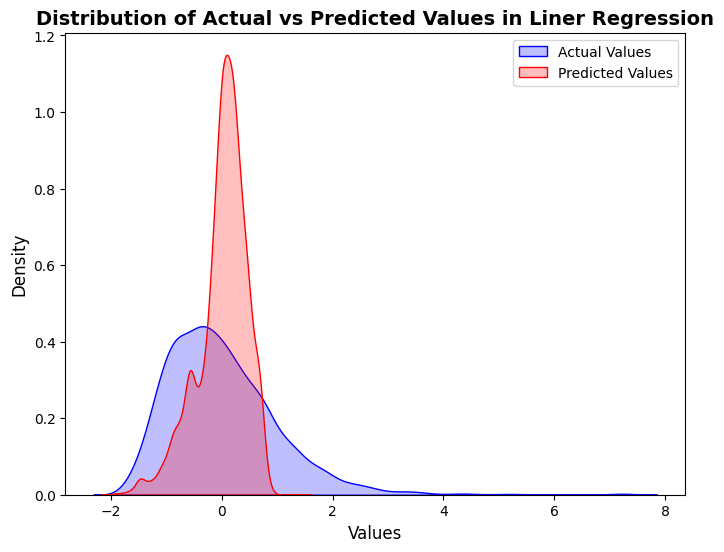

In [ ]:
plt.figure(figsize=(8, 6))
sns.kdeplot(y_test, label='Actual Values', color='blue', fill=True)
sns.kdeplot(y_pred, label='Predicted Values', color='red', fill=True)
plt.xlabel('Values',fontsize=12)
plt.ylabel('Density',fontsize=12)
plt.title('Distribution of Actual vs Predicted Values in Liner Regression', fontsize=14, fontweight='bold')
plt.legend()
plt.show()

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.018498662228749824
R-squared: 0.9822119369116634


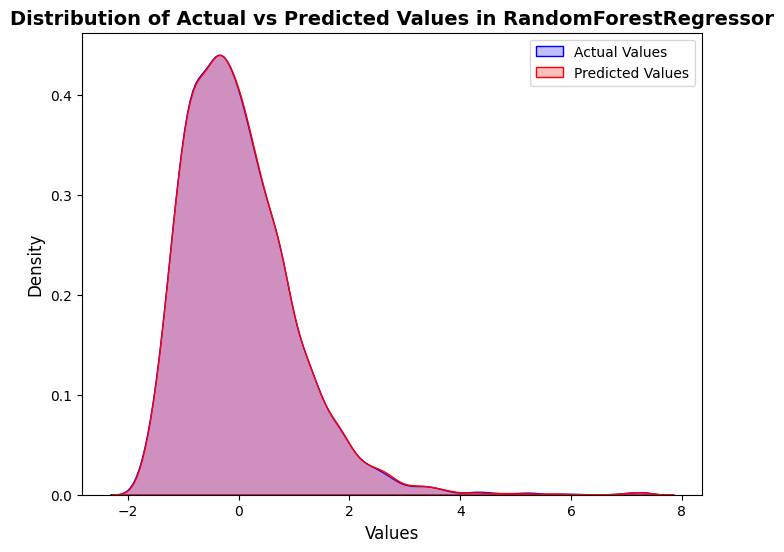

In [ ]:
plt.figure(figsize=(8, 6))
sns.kdeplot(y_test, label='Actual Values', color='blue', fill=True)
sns.kdeplot(y_pred, label='Predicted Values', color='red', fill=True)
plt.xlabel('Values',fontsize=12)
plt.ylabel('Density',fontsize=12)
plt.title('Distribution of Actual vs Predicted Values in RandomForestRegressor', fontsize=14, fontweight='bold')
plt.legend()
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.022481643301034592
R-squared: 0.9783819562505028


GBR = GradientBoostingRegressor()
GBR.fit(X_train, y_train)
y_pred_Test_GBR = GBR.predict(X_test)
y_pred_Train_GBR = GBR.predict(X_train)
score_train_GBR = GBR.score(X_train, y_train)
score_test_GBR = GBR.score(X_test, y_test)
CV_GBR = cross_val_score(GBR, X, y, scoring='neg_mean_squared_error', cv=5)
CV_GBR_mean = np.mean(CV_GBR)
MSR_Test_GBR = mean_squared_error(y_test, y_pred_Test_GBR)
MSR_Train_GBR = mean_squared_error(y_train, y_pred_Train_GBR)
print('Metrics for GradientBoostingRegressor')
print('Train Score is:', score_train_GBR)
print('Test Score is:', score_test_GBR)
print('Mean Squared Error Train is:', MSR_Train_GBR)
print('Mean Squared Error Test is:', MSR_Test_GBR)
print('Cross Validation is:', CV_GBR)
print('Mean Cross Validation is:', CV_GBR_mean)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)
y_pred = gb_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.0033440152588004616
R-squared: 0.9967844402121437


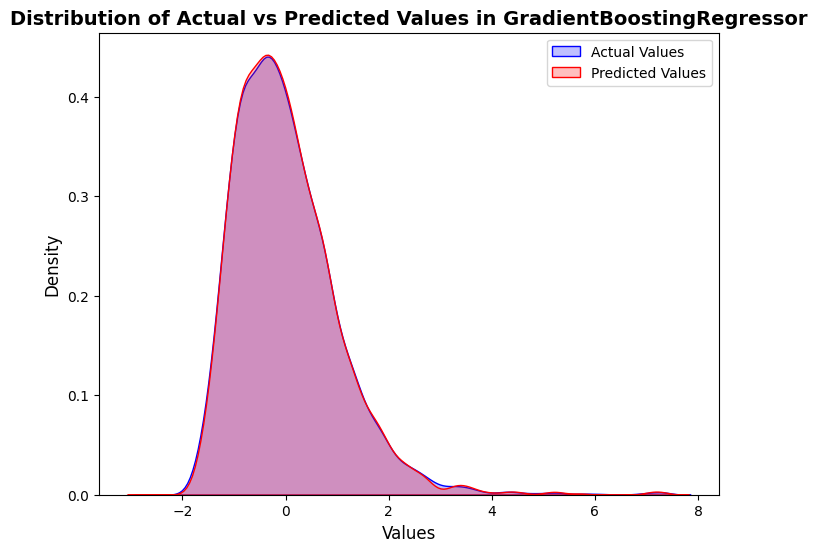

In [ ]:
plt.figure(figsize=(8, 6))
sns.kdeplot(y_test, label='Actual Values', color='blue', fill=True)
sns.kdeplot(y_pred, label='Predicted Values', color='red', fill=True)
plt.xlabel('Values', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Distribution of Actual vs Predicted Values in GradientBoostingRegressor', fontsize=14, fontweight='bold')
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

# Initialize models
models_dict = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(random_state=42),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
    "GradientBoostingRegressor": GradientBoostingRegressor(random_state=42)
}

# Initialize metric lists
train_scores, test_scores, cv_scores = [], [], []
mse_train, mse_test = [], []

# Loop through models
for name, model in models_dict.items():
    model.fit(X_train_scaled, y_train)
    y_pred_train = model.predict(X_train_scaled)
    y_pred_test = model.predict(X_test_scaled)

    # R² Scores
    train_scores.append(r2_score(y_train, y_pred_train))
    test_scores.append(r2_score(y_test, y_pred_test))

    # Cross-validation
    cv_score = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
    cv_scores.append(cv_score.mean())

    # MSE
    mse_train.append(mean_squared_error(y_train, y_pred_train))
    mse_test.append(mean_squared_error(y_test, y_pred_test))


In [ ]:
models = list(models_dict.keys())

df_comparison = pd.DataFrame({
    "Model": models,
    "Train Score": train_scores,
    "Test Score": test_scores,
    "Mean CV Score": cv_scores,
    "MSE Train": mse_train,
    "MSE Test": mse_test
})

df_comparison.sort_values(by="Test Score", ascending=False)


,Model,Train Score,Test Score,Mean CV Score,MSE Train,MSE Test
3,GradientBoostingRegressor,0.997714,0.996784,0.986917,2.263417e-03,0.003344
1,Random Forest Regressor,0.997705,0.982201,0.978270,2.271552e-03,0.018510
2,Decision Tree Regressor,1.000000,0.978381,0.966558,8.195379e-32,0.022482
0,Linear Regression,0.223942,0.258949,0.205832,7.682911e-01,0.770655


<ipython-input-42-20cbd928b675>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_comparison["Model"], y=df_comparison["Test Score"], palette="Greens_r")


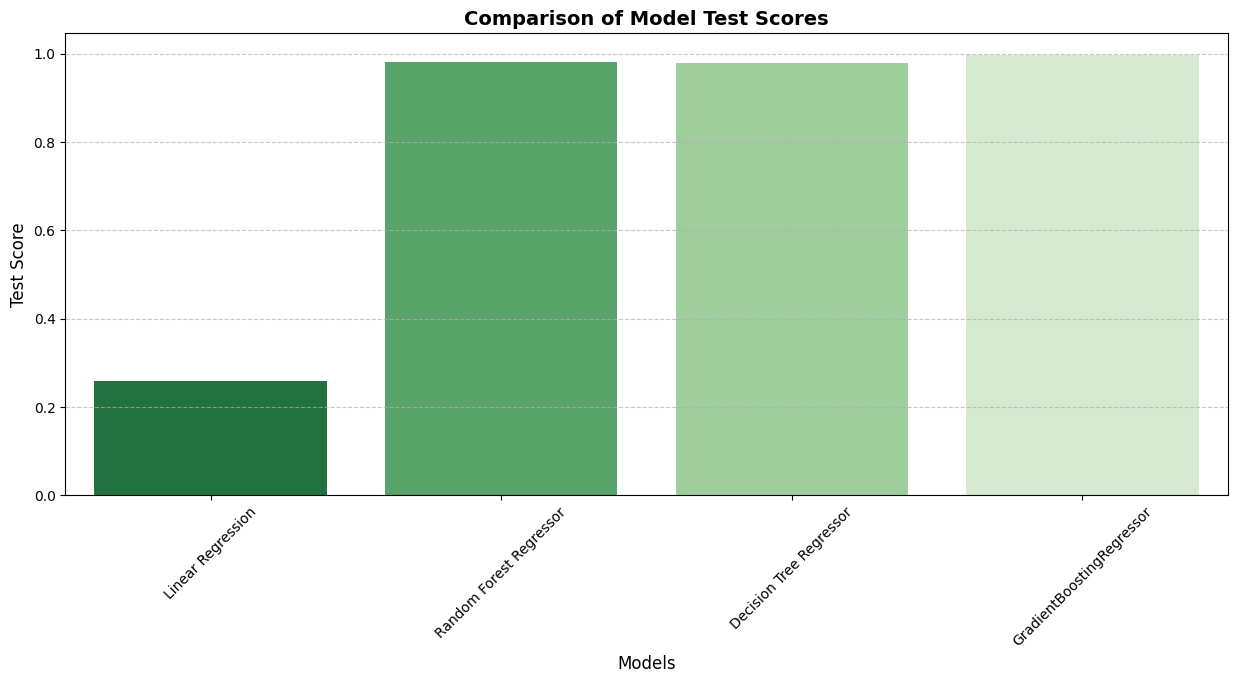

In [ ]:
plt.figure(figsize=(15, 6))
sns.barplot(x=df_comparison["Model"], y=df_comparison["Test Score"], palette="Greens_r")
plt.xlabel("Models", fontsize=12)
plt.ylabel("Test Score", fontsize=12)
plt.title("Comparison of Model Test Scores", fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()